In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

def count_frequencies(annotations):
    counts = np.bincount(annotations)
    counts = np.pad(counts, (0, 7 - len(counts)), 'constant')  # Preenche com zeros as classes ausentes
    return counts

def extract_annotations(file_path):
    with h5py.File(file_path, 'r') as hf:
        annotations_group = hf['annotations']
        annotations = [ann[()].flatten() for ann in annotations_group.values()]
    return np.concatenate(annotations)

def plot_histogram(counts, title):
    plt.figure(figsize=(10, 5))
    classes = ['(nothing)', 'scream', 'Violência Física', 'gunshot', 'explosion','scream_effort', 'multiple_actions']
    plt.bar(classes, counts, alpha=0.5, edgecolor='black', linewidth=1.2)
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Frequência')
    plt.show()

In [3]:
annotations_audio = extract_annotations('../h5_files/audio_features.h5')






In [4]:
annotations_vsd = extract_annotations('../h5_files/vsd_clipped_features.h5')


In [5]:
counts_audio = count_frequencies(annotations_audio)


In [6]:
counts_vsd = count_frequencies(annotations_vsd)




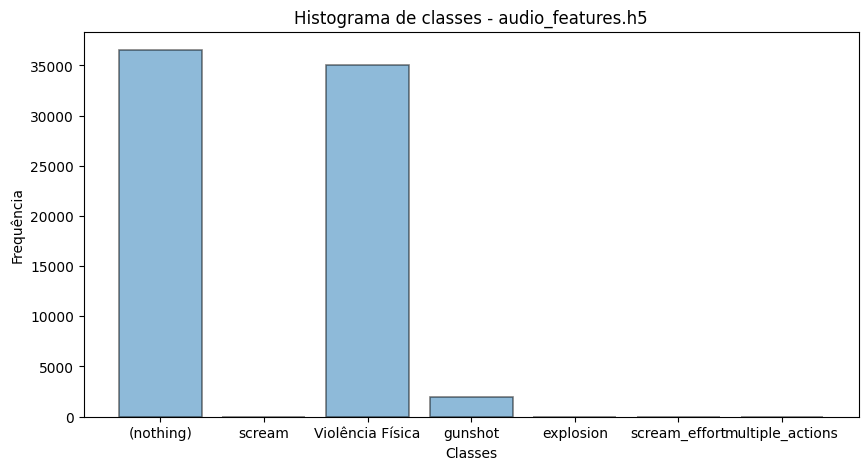

In [7]:
plot_histogram(counts_audio, 'Histograma de classes - audio_features.h5')


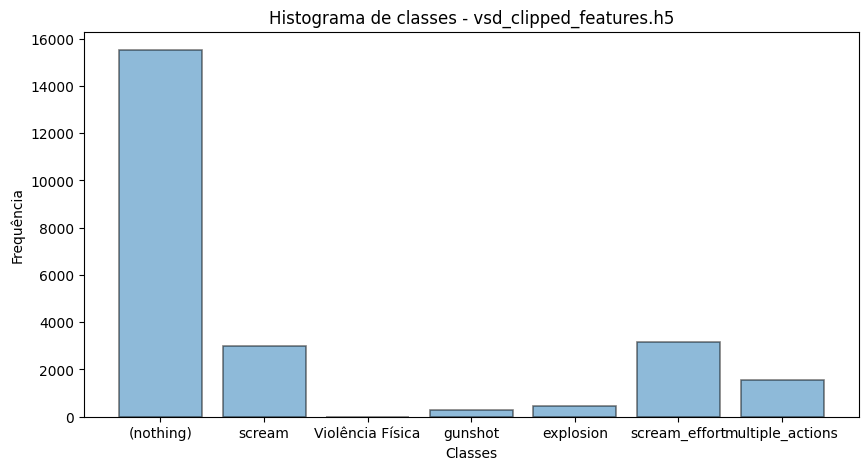

In [8]:
plot_histogram(counts_vsd, 'Histograma de classes - vsd_clipped_features.h5')



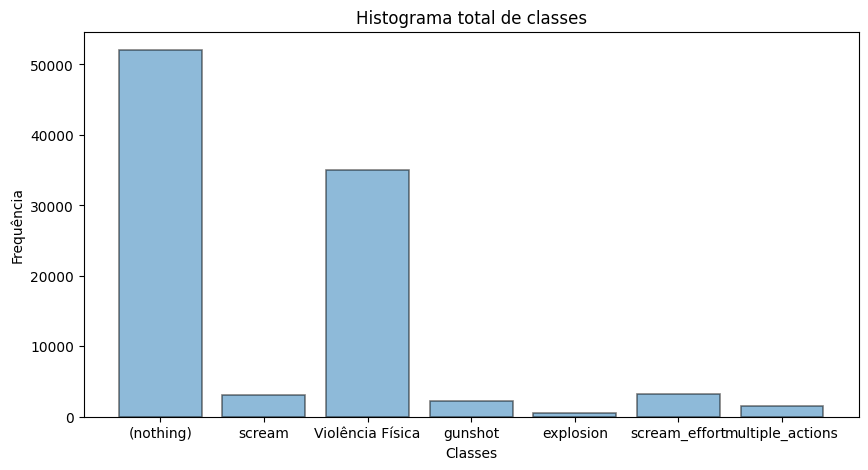

In [9]:
# Para o histograma total, vamos somar as contagens dos dois arquivos
counts_total = counts_audio + counts_vsd
plot_histogram(counts_total, 'Histograma total de classes')